In [1]:
import scipy.stats as stats
import numpy as np
import numpy.random as npr

import matplotlib.pyplot as plt
%matplotlib inline

import pickle

In [2]:
file=open("lightbulb.pickle","rb")
lb=pickle.load(file)
file.close()

### Lecture 33 Assignment

**Answer the questions below in a Jupyter Notebook and submit your responses as a PDF of that notebook.**

1. (5 points) Plot the estimated density using Gaussian kernel density estimation. On the same axes, plot the pdf of the exponential random variable with the  mean that we estimated from the data

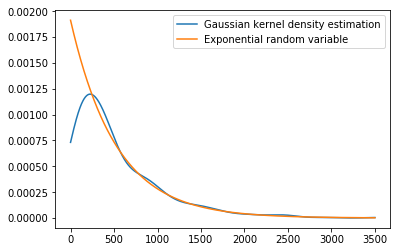

In [3]:
lb_kde = stats.gaussian_kde(lb) # the gaussian kernel density estimation

mu_hat = lb.mean()
E = stats.expon(scale=mu_hat) # the exponential RV

x = np.linspace(0, 3500, 1000) # our x range

# plot the gaussian kernel density estimation on the same axes as the exponential RV
plt.plot(x, lb_kde(x), label="Gaussian kernel density estimation")
plt.plot(x, E.pdf(x), label="Exponential random variable")

plt.legend();

2. (5 points) Generate a Q-Q plot for the lightbulb dataset by sampling from an exponential random variable with the default mean  ($\mu=1$).

    a) Plot the Q-Q plot for the reference exponential random variable with the estimated mean and in a separate plot show the Q-Q plot with $\mu=1$

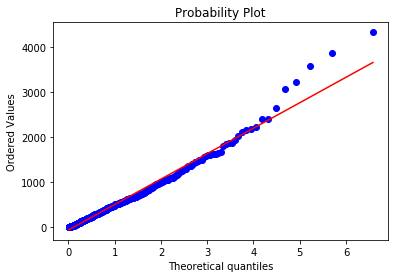

In [4]:
E_quantiles, E_regression = stats.probplot(E.rvs(len(lb)), dist='expon', plot=plt);

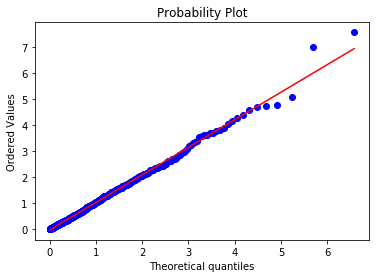

In [5]:
E_Def = stats.expon() # an exponential RV, with the default scale of 1
E_Def_quantiles, E_Def_regression = stats.probplot(E_Def.rvs(len(lb)), dist='expon', plot=plt);

    b) Estimate the slope and intercept of the line in each case.

In [6]:
E_slope,E_intercept,E_R = E_regression
E_Def_slope,E_Def_intercept,E_Def_R = E_Def_regression

print("For the reference exponential RV with estimated mean, the slope of the line is ", E_slope, " and its y-intercept is ", E_intercept, ".", sep="")
print("For the exponential RV with mu = 1, the slope of the line is ", E_Def_slope, " and its y-intercept is ", E_Def_intercept, ".", sep="")

For the reference exponential RV with estimated mean, the slope of the line is 564.3980103846649 and its y-intercept is -59.062136175803005.
For the exponential RV with mu = 1, the slope of the line is 1.0619736391889456 and its y-intercept is -0.04670306283974113.


In [7]:
print("R^2 for the mu = estimated mean random variable is equal to", E_R**2)
print("R^2 for the mu = 1 random variable is equal to", E_Def_R**2)

R^2 for the mu = estimated mean random variable is equal to 0.980965543428245
R^2 for the mu = 1 random variable is equal to 0.995886632447324


    c) When we plot the Q-Q plot with the reference variable having $\mu=1$, what does the slope tell us about the data set?

For the reference variable having mu = 1, it has a slope of approximately 1 (0.991). This means that this reference variable is a very good match on the theoretical exponential quantiles, which is exactly what we should expect (this random variable is an exponential random variable, after all). This means that the two data sets are 'similar'.

For the random variable with mean equal to the estimated mean, we see that the slope is equal to slightly over 500. This means that theoretical exponential quantiles and the quantiles on the data set are indeed linearly related. However, they are not similar and their data points differ greatly in magnitude.

3. (10 points for each data set) The files a.pickle, b.pickle, and c.pickle contain data drawn from common distributions. In particular, each file contains one array, and the array are drawn from one of the following distributions:

    i) Gaussian

    ii) Student's $t$-distribution with either 1, 2, or 3 degrees of freedom

    iii) Gamma with parameter 1, 2, or 3

    For each file:
    
    a) Load the data from the pickle file

   b) Generate a histogram of the data, choosing an appropriate number of bins

   c) Plot the estimated density using kernel density estimation (With the Gaussian kernel. You can use the appropriate scipy.stats method.)

   d) Use the ```stats.probplot``` method to determine the distribution (and parameter) that best matches the data. Note that when you call ```stats.probplot``` and specify a distribution, you can also pass a tuple ```sparams``` with paramters of the distribution. For example, to pass 3 degrees of freedeom for the Student's $t$-distribution, you could set ```sparams=(2,)```. (Recall that for a tuple with only one entry, you have to put a comma after that entry to distinguish it from an expression.)  If your answer is Gamma or Student's $t$, specify the value of the parameter  of the distribution (the degrees of freedom in the case of Student's $t$).  You do **NOT** have to show all the plots in this part.

   e) Plot the probability plot for the data with the reference that best matches the distribution.

   f) Plot the normal probabiity plot for the data.


In [8]:
# a - a
file=open("a.pickle","rb")
a=pickle.load(file)
file.close()

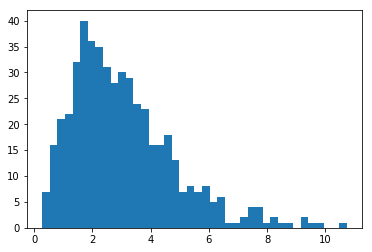

In [9]:
# a - b
plt.hist(a,bins=40);

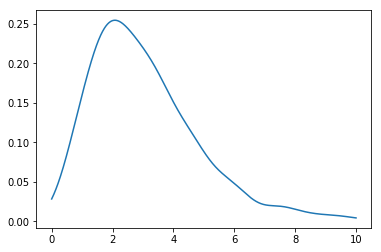

In [10]:
# a - c
a_kde = stats.gaussian_kde(a) # the gaussian kernel density estimation
x = np.linspace(0, 10, 1000) # our x range
plt.plot(x, a_kde(x), label="Gaussian kernel density estimation") # plot the gaussian kernel density estimation

In [11]:
def find_best_fit(data):
    
    gaussian_quantiles,gaussian_regression = stats.probplot(data, dist="norm"); # gaussian distribution
    t1dof_quantiles,t1dof_regression = stats.probplot(data, sparams=(1,), dist="t"); # Student's t-distribution with 1 dof
    t2dof_quantiles,t2dof_regression = stats.probplot(data, sparams=(2,), dist="t"); # Student's t-distribution with 2 dof
    t3dof_quantiles,t3dof_regression = stats.probplot(data, sparams=(3,), dist="t"); # Student's t-distribution with 3 dof
    gamma1_quantiles,gamma1_regression = stats.probplot(data, sparams=(1,), dist="gamma"); # Gamma distribution with paramater of 1
    gamma2_quantiles,gamma2_regression = stats.probplot(data, sparams=(2,), dist="gamma"); # Gamma distribution with paramater of 2
    gamma3_quantiles,gamma3_regression = stats.probplot(data, sparams=(3,), dist="gamma"); # Gamma distribution with paramater of 3

    _,_,R_gaussian = gaussian_regression
    _,_,R_t1dof    = t1dof_regression
    _,_,R_t2dof    = t2dof_regression
    _,_,R_t3dof    = t3dof_regression
    _,_,R_gamma1   = gamma1_regression
    _,_,R_gamma2   = gamma2_regression
    _,_,R_gamma3   = gamma3_regression

    print("Gaussian fit:",R_gaussian**2)
    print("Student's t-distribution 1 DOF fit:",R_t1dof**2)
    print("Student's t-distribution 2 DOF fit:",R_t2dof**2)
    print("Student's t-distribution 3 DOF fit:",R_t3dof**2)
    print("Gamma distribution w/ param of 1 fit:",R_gamma1**2)
    print("Gamma distribution w/ param of 2 fit:",R_gamma2**2)
    print("Gamma distribution w/ param of 3 fit:",R_gamma3**2)
    
    R_vals = [R_gaussian, R_t1dof, R_t2dof, R_t3dof, R_gamma1, R_gamma2, R_gamma3]
    quantiles = [gaussian_quantiles, t1dof_quantiles, t2dof_quantiles, t3dof_quantiles, gamma1_quantiles, gamma2_quantiles, gamma3_quantiles]
    
    return quantiles[  R_vals.index(max(R_vals))  ] # return the quantile associated with the best fit


In [12]:
# a - d
find_best_fit(a);

Gaussian fit: 0.9241201103670237
Student's t-distribution 1 DOF fit: 0.23544805099704122
Student's t-distribution 2 DOF fit: 0.7306343781899685
Student's t-distribution 3 DOF fit: 0.8652109286852852
Gamma distribution w/ param of 1 fit: 0.9731867192280637
Gamma distribution w/ param of 2 fit: 0.9968268481083503
Gamma distribution w/ param of 3 fit: 0.998152517617239


The best fit for this data appears to be the gamma distribution with a paramater of 3.

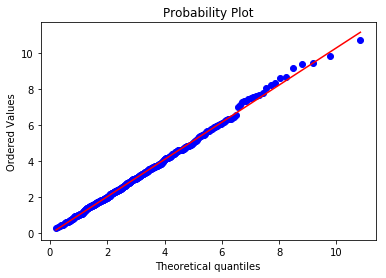

In [13]:
# a - e
stats.probplot(a,sparams = (3,),dist='gamma',plot=plt);

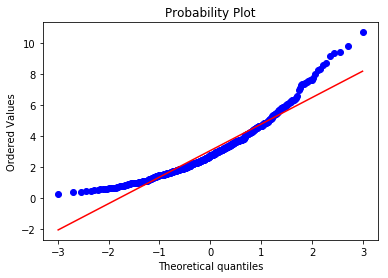

In [14]:
# a - f
stats.probplot(a,dist='norm',plot=plt);

In [15]:
# b - a
file=open("b.pickle","rb")
b=pickle.load(file)
file.close()

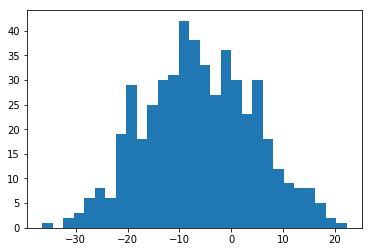

In [16]:
# b - b
plt.hist(b,bins=29);

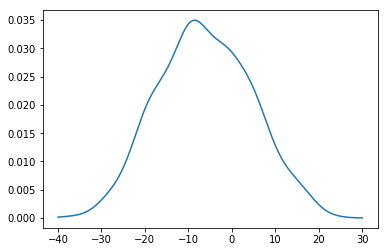

In [17]:
# b - c
b_kde = stats.gaussian_kde(b) # the gaussian kernel density estimation
x = np.linspace(-40,30, 1000) # our x range
plt.plot(x, b_kde(x)) # plot the gaussian kernel density estimation

In [18]:
# b - d
find_best_fit(b);

Gaussian fit: 0.9964144275810631
Student's t-distribution 1 DOF fit: 0.21593040816396397
Student's t-distribution 2 DOF fit: 0.7355313163578466
Student's t-distribution 3 DOF fit: 0.8966777519741511
Gamma distribution w/ param of 1 fit: 0.8251734918453
Gamma distribution w/ param of 2 fit: 0.9058037814165446
Gamma distribution w/ param of 3 fit: 0.935781684323737


The best fit for this data appears to be a gaussian distribution.

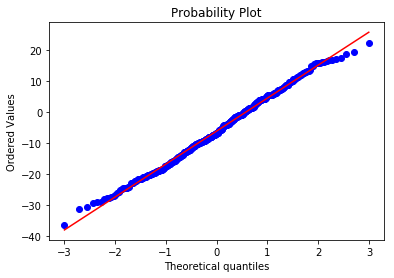

In [19]:
# b - e
stats.probplot(b,dist='norm',plot=plt);

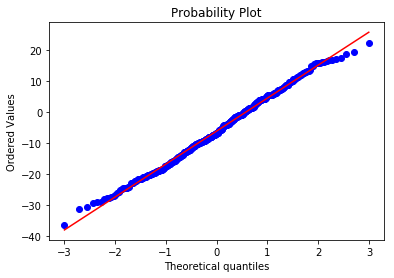

In [20]:
# b - f
stats.probplot(b,dist='norm',plot=plt); # part f and part e have the same answer

In [21]:
# c - a
file=open("c.pickle","rb")
c=pickle.load(file)
file.close()

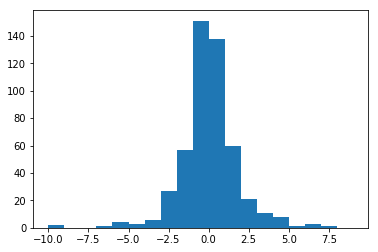

In [22]:
# c - b
plt.hist(c,bins=range(-10,10));

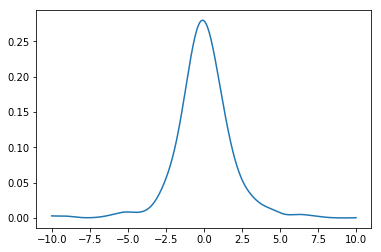

In [23]:
# c - c
c_kde = stats.gaussian_kde(c) # the gaussian kernel density estimation
x = np.linspace(-10,10, 1000) # our x range
plt.plot(x, c_kde(x)) # plot the gaussian kernel density estimation

In [24]:
# c - d
find_best_fit(c);

Gaussian fit: 0.8289195784156921
Student's t-distribution 1 DOF fit: 0.5585059393965778
Student's t-distribution 2 DOF fit: 0.9692084445887648
Student's t-distribution 3 DOF fit: 0.9680177363332064
Gamma distribution w/ param of 1 fit: 0.6983673778139556
Gamma distribution w/ param of 2 fit: 0.7468739263079524
Gamma distribution w/ param of 3 fit: 0.7678458495196636


The best fit for this data appears to be the Student's t-distribution, with 2 degrees of freedom.

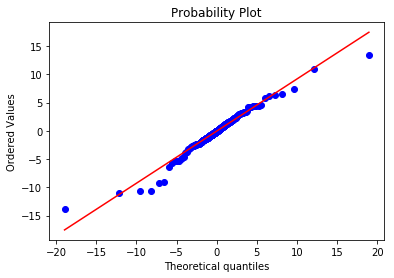

In [25]:
# c - e
stats.probplot(c,sparams=(2,),dist='t',plot=plt);

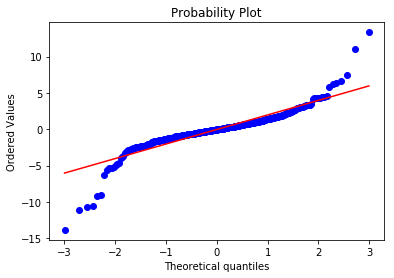

In [26]:
# c - f
stats.probplot(c,dist='norm',plot=plt);